# Version Control Systems & Git [^intro]

[^intro]: This Jupyter Notebook is based on Chapters 1 and 2 of {cite}`chacon2014pro`.

In this notebook, we introduce the main concepts behind Version Control Systems and Git. We will also cover the main actions that Git supports and how to run them from the command line. A series of tutorials will accompany this notebook. Contrary to the command line approach, these tutorials will focus on how to perform the main Git actions with an Integrated Development Environment (IDE).

## Version Control System (VCS) <a class="anchor" id="vcs"></a>

A **Version Control System (VCS)** is a system in charge of recording changes made to a file or set of files. These files are linked to specific versions. Therefore, you will be able to navigate through the history of a given file when needed. The reasons behind doing this are:

- *reverting files* to a previous version;
- *comparing changes* over time;
- detect when an *issue* was introduced, among others.

In general, VCS will help you recover in case errors and problems impact one or more files. 

But which type of files are we talking about? Basically, we are talking of any type of file. However, in data science, we can think of files storing datasets, reports, or source code.

```{admonition} Version Control System (VCS)
:class: alert
System in charge of managing changes made to a file or set of files.
```

### Centralized VCS

When developing software, most people need to collaborate with other programmers. To deal with this requirement **centralized VCSs** were created. This type of VCSs have a central server that contains all versioned files, and clients check out the latest versions of the files from other machines. Some of the most well-known centralized VCSs include [CVS](http://cvs.nongnu.org/), [Subversion](https://subversion.apache.org/), and [Perforce](https://www.perforce.com/).

The main disadvantage of this approach is that there is a single point of failure, namely the central server hosting the versioned files. If the server goes down or the database gets corrupted, you risk losing all the version information except for possible ad-hoc snapshots in other machines.

```{image} assets/centralized-vcs.png
:alt: Centralized VCS
:width: 400px
:align: center
```

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Centralized VCS. Image taken from <em>Pro Git</em> Scott Chacon and Ben Straub.</span>
</div>
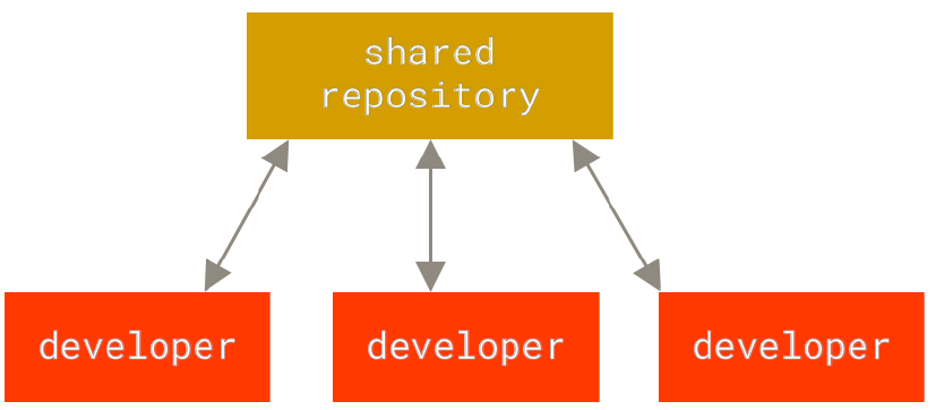

```{admonition} Centralized VCS
:class: alert
CS having a central server that contains all versioned files of a project, and clients check out the latest versions of the files from other machines.
```

### Distributed VCS

To overcome the pitfall of centralized VCSs, **distributed VCSs** were designed. These systems allow clients not only to have the latest versions of the files in their machines but instead the whole history of the repository. This whole copy of the repository is what we know as a *mirror*. Thus, if the server goes down or the database is damaged, information might be restored from any of the client repositories; every client has a full backup of the versioned data. Moreover, you can freely interact with the local repository in your machine and upload any change to the remote server whenever you prefer. Some of the most popular distributed VCSs include [Git](https://git-scm.com/), [Mercurial](https://www.mercurial-scm.org/), [Bazaar](https://bazaar.canonical.com/en/), and [Darcs](http://darcs.net/).


```{image} assets/distributed-vcs.png
:alt: Distributed VCS
:width: 400px
:align: center
```

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Distributed VCS. Image taken from <em>Pro Git</em> Scott Chacon and Ben Straub.</span>
</div>

```{admonition} Distributed VCS
:class: alert
VCS allowing clients to have a mirror of the tracked files of a project.
```

## Git <a class="anchor" id="git"></a>

Git–as previously mentioned–is one of the most popular distributed VCSs. What makes it special is the way it manages versions. Contrary to other solutions that store files and the differences with previous versions (also known as *delta-based version control*); Git sees data as a series of snapshots of a filesystem. Then, every time you commit a change to the repository, Git takes a picture of the current state of the files. For performance purposes, if a file is not changed it will only create a link to the previously stored version of the file.


```{image} assets/delta-based-vc.png
:alt: Delta-based VC
:width: 550px
:align: center
```

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Version control based on deltas. Image taken from <em>Pro Git</em> Scott Chacon and Ben Straub.</span>
</div>

<br>
<br>


```{image} assets/snapshot-based-vc.png
:alt: Snapshot-based VC
:width: 550px
:align: center
```

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Version control based on snapshots. Image taken from <em>Pro Git</em> Scott Chacon and Ben Straub.</span>
</div>

### Git Features

Some of the most notorious Git features include:

* **Integrity:** Every time you commit a change in Git the content will be checksummed–that is, a function will be used to represent the content in another digital representation. This means that if data is changed or corrupted on the fly, Git will be able to detect the issue. git uses the so-called SHA-1 hash to checksum the repositories content. The *SHA-1 hash* is a 40-character string of hexadecimal characters (0-9 and a-f). Every single commit in Git has a hash number that identifies it. An example of a SHA-1 hash looks as follows:

<pre>
24b9da6552252987aa493b52f8696cd6d3b00373
</pre>

* **Data addition:** Git usually only adds data and does not remove it. This property gives us confidence in experimenting with the system without losing any relevant information if we mess things up. In most cases, you will be able to go back to a stable and working version.

### Git States

Every file can be in one of the three following states in Git:

* **Modified:** the file has been changed but it has not been managed by the VCS.
* **Staged:** the file has been added to be part of the next commit snapshot.
* **Committed:** the commit has been safely stored in your local database.


### Sections of a Git Project

A Git project always considers the following three main sections:

* **Working directory:** (also known as the *working tree*) checkout of a specific version of a repository with all corresponding files.
* **Staging area:** (also known as the *index*) file storing the information about the content of the next commit.
* **Git directory:** `.git` folder where Git stores the metadata and database of the project. This is what is copied when you clone a repository.

### Git Workflow

After knowing the main Git sections, you will be able to understand the Git workflow:

1. Check out the specific version of the project. Compressed files in the Git directory are moved to your working directory.
2. Modify files in your working directory.
3. Select and stage the files you want to include in the next commit.
4. Commit the staged files, storing a permanent snapshot in your Git repository.


```{image} assets/git-workflow.png
:alt: Git Workflow
:width: 550px
:align: center
```

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Git workflow. Image taken from <em>Pro Git</em> Scott Chacon and Ben Straub.</span>
</div>

## Getting a Git Repository <a class="anchor" id="git-repo"></a>

There are two ways to get a Git repository:

1. Take a local folder in your machine and turn it into a Git repository.
2. Clone an existing repository from elsewhere.

### Create Local Git Repository

When you have a project that is not under version control and you want to use Git for this matter, you will need to initialize the Git repository in this location. To do so, open the command line and type the following commands:

1. Go to the location of your folder using the `cd` (**c**hange **d**irectory) command.

In Windows:
```
$ cd C:/Users/user/path/to/project
```

In macOS:
```
$ cd /Users/user/path/to/project
```

In Linux:
```
$ cd /home/user/path/to/project
```

2. Initialize the Git repository.

```
$ git init
```

The last step creates the `.git` directory in the specified folder. However, no file has started to be tracked.


### Clone Git Repository

If you want to get a copy of an existing Git repository, you should **clone** it. When you clone a repository you get a full copy of the data stored in the server–that is, every version of every file that is being tracked in the project. To clone a project you need to type the following command in your command line:

```
$ git clone https://repository/url.git
```

## File Status Lifecycle <a class="anchor" id="lifecycle"></a>

Once you have set up your Git repository, you would like to start interacting with it and probably collaborating with other developers. This implies changing the current files and committing those changes to your Git repository.

Git labels files as *tracked* or *untracked*. On the one hand, **tracked files** are files that Git knows about–that is, files that were part of the last snapshot or that have been staged by the user. Moreover, these files can be in an *unmodified*, *modified*, or *staged* state. When you clone a repository, all files are initially labeled as tracked and unmodified. On the second hand, **untracked files** are any other files that are not part of the previous group.

When working with a file, it follows the lifecycle shown in the image below. 

- In the first scenario, an untracked file is added to the staging area. It is then labelled as a *tracked* and *staged* file.
- In the second scenario, a *tracked* and *unmodified* file is edited by a developer. It is immediately labeled as *tracked* and *modified*.
- In the third scenario, a *tracked* and *modified* file is added to the staging area. It is then labeled as a *tracked* and *staged* file.
- In the fourth scenario, a *tracked* and *unmodified* file is removed from the Git repository. It is immediately labeled as *untracked*.
- In the last scenario, a *staged* file is committed to the Git repository. It is then labeled as *tracked* and *unmodified*.

```{image} assets/files-status-lifecycle.png
:alt: Lifecycle of Files Status
:width: 550px
:align: center
```

<div style="text-align:center">
    <span style="font-size:0.9em; font-weight: bold;">Lifecycle of files status. Image taken from <em>Pro Git</em> Scott Chacon and Ben Straub.</span>
</div>

### Verifying Files Status

To check the status of your files you can use the following command:
```
$ git status
```

For a short summary you can use the `-s` or `--short` option:
```
$ git status -s
```
The output of this command is a list of files with two columns. The left-hand side column shows the status of the file in the staging area, and the right-hand side column shows the status of the file in the working tree. The table below shows the possible labels you can have in both columns:

| Status | Description |
|--------|-------------|
| ??     | Untracked file |
| A      | Added to staging area |
| M      | Modified file |


### Tracking and Staging Files

If Git shows you a list of *untracked* files that you would like to start tracking you must use the command `git add`:

```
$ git add path/to/file
```

You can add several files at the same time:

```
$ git add path/to/file1 path/to/file2 path/to/file3
```

Or you can even add all untracked and modified files by using the `.` wildcard:

```
$ git add .
```

However, be careful with the last one given that you might include changes that you do not want others to see or that might impact the project negatively because changes are not stable.

### Viewing Specific Changes

If you want to know what you have changed and not just the list of modified files, you can use the `git diff` command:

```
$ git diff 
```

This command will list all the changes you have made to the repository. In short, it compares what is in your working directory with what is in the staging area. These changes–including additions and removals–are what we know as a **patch**.

However, the `git diff` command won't show any change if those changes have been staged already. If you want to check the changes that you have staged and that will go in the next commit, you can use the `--staged` option. The command will then compare your staged changes against the last commit:

```
$ git diff --staged
```

### Committing Changes

Once you have set up your staging area–meaning that you have added the files you want to track and modified in the Git repository (with the `git add` command)– you can proceed with committing such changes as follows:

```
$ git commit
```

This command will launch the default editor stored in the `git config --global core.editor` variable. You will be able to add a message that describes the content of your commit. You can also write this message directly when writing the `git commit` command with the `-m` option:

```
$ git commit -m "Your message here"
```

You must add a description to your commit, otherwise, the operation will be aborted.

In general, commits should be atomic, meaning that they contain changes related to a very specific requirement. If you achieve this you will be able to write a meaningful commit message. Good practices on writing meaningful commit messages include:

- Answer the question *what are the changes for?*
- Using the *imperative form of the verb* at the beginning of the message. For example: "Modify README file to list contributors". Avoid using other forms of the verb such as "Added", "Adding", etc.
- *Keep it short*. Include between 50 to 70 characters that explain the purpose of the commit.
- *Be consistent*. There are several conventions to create your commit messages. Investigate a bit about them and choose the one that you prefer. Once you make a decision stick to it and be consistent.


## Remote Repositories <a class="anchor" id="remote-repos"></a>
 
A **remote repository** is a version of your project stored in a server somewhere on the Internet (or even on your own machine, but this is out of the scope of this course). You can have multiple remote repositories. To collaborate with others, you need to *push* and *pull* data from these remote repositories. In this course, we will only work with one remote repository.

To list the remote repositories associated with your project, you can type the following command:

```
$ git remote
```

This command will list the short names of all the remote repositories you have configured. At least you will get the `origin` repository, which is the default name Git gives to the repository from which you clone your project. When cloning your project, the `origin` repository is automatically created for you.

### Branches

When you initialize a git repository you will automatically get a branch, which is a line of development that keeps track of related commits. The name of the branch that you get by default with Git is called the `master` branch. You will have then a local version of the branch, which will also be set up to track a remote branch in your remote repository. To list your local branches run the following command:

```
$ git branch
```

You can create other branches, but once again, this is out of the scope of the course. For more information, we encourage you to read the "Git Branching" chapter of the ProGit book referenced by this notebook.

### Pulling Changes 

Once you have set up your branch, you can fetch all changes introduced in the remote repository and merge them into your local version with the following command:

```
$ git pull
```

### Pushing Changes

When you have created some commits in your local repository and you want to share them in the remote repository you can use the `git push <remote> <branch>` command. For instance, if you want to push your changes to the `master` branch of the `origin` repository, you will type:

```
$ git push origin master
```

This command will work only if no one has pushed new commits between your last pull and the moment you try to push your changes. If someone pushed after you fetched the repository and before you try to push your changes, you will be requested to pull again first, merge the modifications, solve conflicts if any, and try to push one more time.

## When Things Go Wrong <a class="anchor" id="wrong"></a>

We are humans, we make mistakes. Git knows this, that is why it provides us with a set of commands that will help us fix these issues. However, you need to be careful because if you do it incorrectly you might lose information on the road.

### Fixing a Commit Message

If you want to change the commit message of your previous commit, and you have not changed anything in your staging area, you can use the following command:

```
$ git commit --amend
```

The default editor will be launched with the previous message, then you will be able to modify it as you want.

### Add Forgotten File to Commit

You can also use the `git commit --amend` if you forgot to add a file to the previous commit. To this aim, you will need to add the file to the staging area (using the `git add` command), and write `git commit --amend`. 

```
$ git commit -m "Commit without file1"
$ git add file1
$ git commit --amend
```
The second commit will modify the first one, so you will end up with only one commit instead of two. What is actually happening is that the first commit is being replaced by the enhanced commit created in the last line.

### Unstaging a Staged File

If you accidentally added a file to your staging area, you can remove it from there by using the `git reset` command. For instance, let us imagine that you add all modified files in your working directory to the staging area as follows:

```
$ git add .
```

You then realize that you made a mistake, and one of the files (e.g. `file2`) must be removed from the coming commit. To do so you will need to type:

```
$ git reset HEAD path/to/file2
```

Alternatively, you can use the following command:

```
$ git restore --staged path/to/file2
```

After executing any of the two previous commands, the file will still keep your changes but it will be removed from the staging area.


### Unmodifying a Modified File

But what if you want to even discard the changes introduced to `file2` and get the version you had in the previous commit? For that, you can use the following command:

```
$ git checkout path/to/file2
```

Alternatively, you can use the following command:

```
$ git restore path/to/file2
```

Be careful with these commands. Once executed *you will lose all the changes you introduced before*. Use them only if you are absolutely sure that this is what you want.